In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/deepr/Desktop/Oasis Infobyte/Task 5/Sales prediction/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.shape

(200, 4)

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

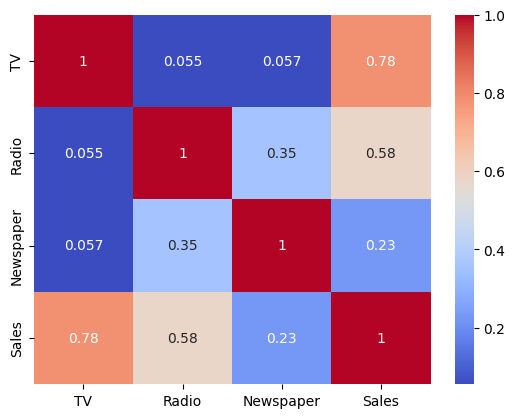

In [12]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

<Axes: >

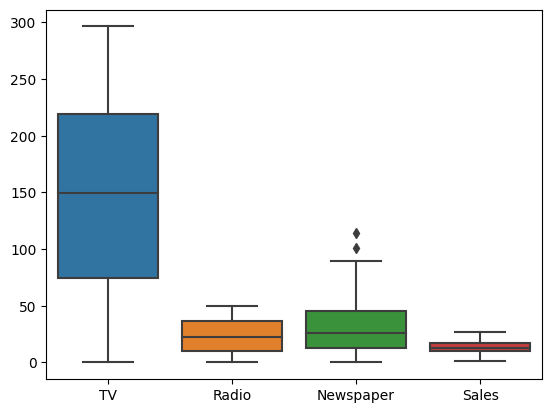

In [13]:
sns.boxplot(df)

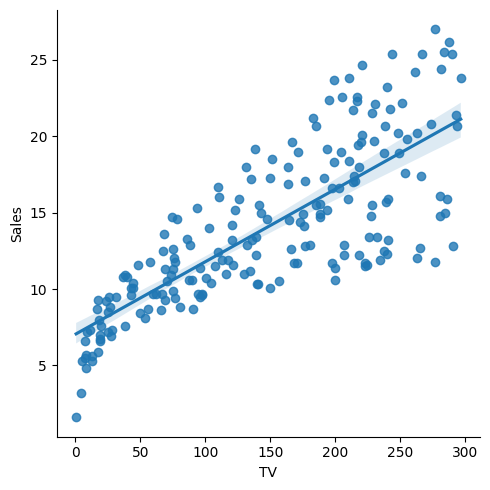

In [14]:
sns.lmplot(data=df, x='TV', y="Sales")

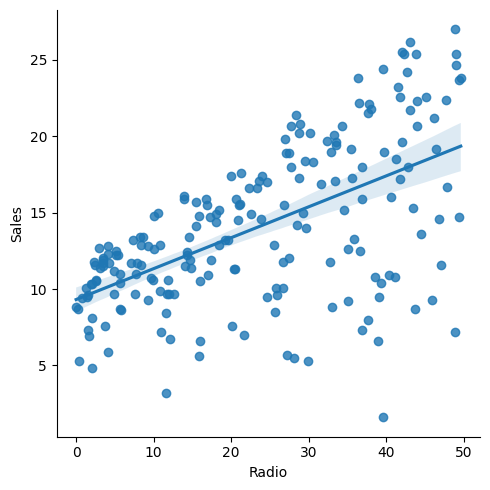

In [15]:
sns.lmplot(data=df, x='Radio', y="Sales")

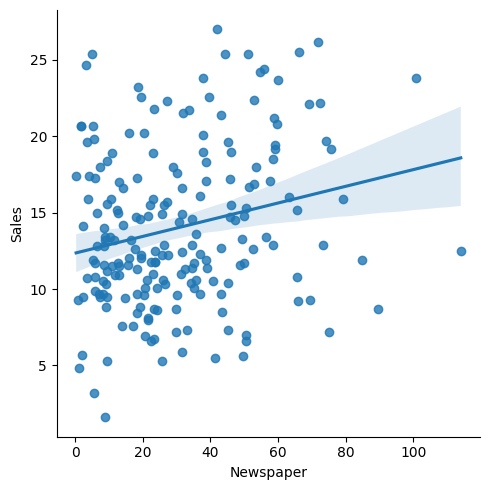

In [16]:
sns.lmplot(data=df, x='Newspaper', y="Sales")

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75, random_state=0)

In [19]:
model=LinearRegression()

model.fit(X_train,y_train)

y_predict=model.predict(X_test)

In [20]:
print(model.intercept_)
print(model.coef_)

2.89257005115115
[0.04416235 0.19900368 0.00116268]


In [21]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predict.flatten()
})
act_predict.head(10)

,Actual,Predict
0,11.3,10.049457
1,8.4,7.430523
2,8.7,6.971521
3,25.4,24.163787
4,11.7,12.002156
5,8.7,6.543346
6,7.2,13.095263
7,13.2,14.958792
8,9.2,11.005284
9,16.6,16.272346


Evaluate the model

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predict)))
print("r2_score:",r2_score(y_test,y_predict))

Mean_absolute_error: 1.3000320919235444
Mean_squared_error: 4.012497522917095
Squre_Mean_absolute_error: 1.1401894982517355
r2_score: 0.8576396745320894
